## 오류 및 누락 데이터

데이터 과학이나 기계 학습 프로젝트에 앞서 데이터를 수집하거나 다운로드해야 합니다. 이상적인 시나리오에서는 데이터가 오류 없이 높은 품질로 수집됩니다. 그러나 실제로는 어떤 데이터 집합도 깨끗하지 않습니다. 데이터 세트를 사용하기 전에 모든 데이터 세트에 오류와 누락 데이터가 있는지 확인해야 합니다. 잘못되거나 누락된 데이터가 있는 경우 데이터 분석은 정확하지 않기 때문에 항상 데이터를 확인하는 것이 중요합니다!

노트북을 시작할 때 필요한 모듈을 가져와야 합니다. 아래 셀을 실행시켜서 필요한 라이브러리를 가져옵니다.

In [372]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 1. 오류 데이터

오류 데이터는 잘못 수집되거나 데이터 세트에 잘못 입력된 데이터를 말합니다. 예를 들어 집에 있는 방의 수를 포함하는 데이터 세트가 있는 경우 방의 수가 음수일 수 없기 때문에 모든 값이 양수일 것으로 예상할 수 있습니다. 따라서 데이터 세트 내의 모든 음수 값은 오류 데이터 입니다.

경우에 따라서는 오류 데이터를 식별하는 것이 쉬울 수 있지만 항상 그렇지는 않습니다. 집에 있는 방의 수를 다시 생각해 보면 너무 큰 숫자도 오류일 수 있습니다. 그러나 지금은 큰 숫자가 오류인지 이상값인지 명확하지는 않습니다. 왜냐하면 대저택과 같은 매우 큰 집은 많은 방이 있을 수 있기 때문입니다. 대저택은 드물기 때문에 데이터 포인트가 이상값으로 표시될 수 있습니다. 이상치는 오류 데이터가 아닙니다! 이상치는 매우 드문 경우일 뿐 여전히 유효한 데이터 입니다.

다음 예는 잘못된 데이터와 이상치의 차이점을 보여줍니다.

## 1.1 컴퓨터 게임 가격

우리는 컴퓨터 게임의 가격이 게임을 좋아하는 사람들의 수와 관련이 있는지 여부를 연구하는 과제를 받았습니다. 이것은 게임 개발 회사가 최신 게임의 가격을 조정하는 데 도움을 줄 것입니다. 미국 달러(USD)로 가격 데이터를 모두 수집하였고, 게임을 좋아한 사람의 숫자도 수집하였다고 가정하면, 이제 데이터에 이상값이나 잘못된 데이터가 포함되어 있는지 확인해야 합니다. 아래 코드를 실행하고 출력을 확인해 보세요.

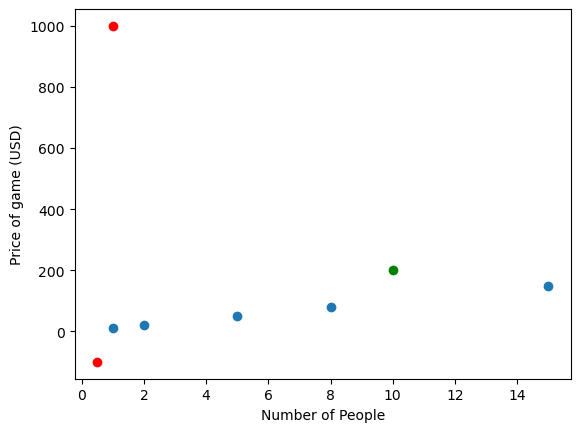

In [373]:
# game_name은 게임의 이름을 나타냅니다.
# game_price는 컴퓨터 게임의 가격을 나타내고 num_people은 게임을 좋아한 사람들의 수를 나타냅니다.
game_name = ['Phone of duty','PIFA soccer','Lario cart','Hokemon','Loom','League of failures','Fritnite','Fatty Trotter']
game_price = [10,20,50,150,80,200,1000,-100]
num_people = [1,2,5,15,8,10,1,0.5]

plt.scatter(num_people[0:5],game_price[0:5])
plt.scatter(num_people[5],game_price[5],c='g')
plt.scatter(num_people[6:8],game_price[6:8],c='r')

plt.xlabel('Number of People')
plt.ylabel('Price of game (USD)')

plt.show();

위의 그림에서 무엇을 알 수 있습니까?

빨간색으로 표시된 부분은 잘못된 데이터인 것 같습니다. 빨간색으로 표시된 첫 번째 점은 가격이 음수이고 게임을 좋아한 사람이 0~1명 사이이기 때문에 오류입니다. 게임이 마이너스 가격으로 판매될 수도 없고, 게임을 좋아하는 사람이 분수로 나타날 수 없습니다. 게임을 좋아하는 사람의 수는 정수여야 합니다. 빨간색으로 표시된 두 번째 점은 컴퓨터 게임이 1000달러만큼 비싸지 않기 때문에 오류입니다.

빨간색 데이터 포인트가 잘못되었으므로 데이터 세트에서 이러한 값을 제거해야 합니다. 위의 코드를 복사하여 편집하여 잘못된 점을 제거하고 나머지 점만 표시합니다. 아래 편집된 코드를 실행합니다. 이 작업을 올바르게 수행했다면 '가격'에 대한 음수 값과 '인원 수'에 대한 분수가 없을 것입니다.

<font color=blue>보너스: 오류 게임의 이름을 말할 수 있습니까?</font>

Fritnite, Fatty Trotter입니다

In [374]:
game_name, game_price, num_people

for name, price in zip(game_name, game_price) :
    #print(name, price)
    if price < 0 or price >= 1000 :
        print(name)

print('= '*20)

for name, num in zip(game_name, num_people) :
    if(type(num_people)== float) :
        print(name)

Fritnite
Fatty Trotter
= = = = = = = = = = = = = = = = = = = = 


In [375]:
# 리턴값 for 문 조건

print([name for name, price in zip(game_name, game_price) if price < 0 or price >= 1000])

print([name for name, num in zip(game_name, game_price) if (type(num_people)== float)])

['Fritnite', 'Fatty Trotter']
[]


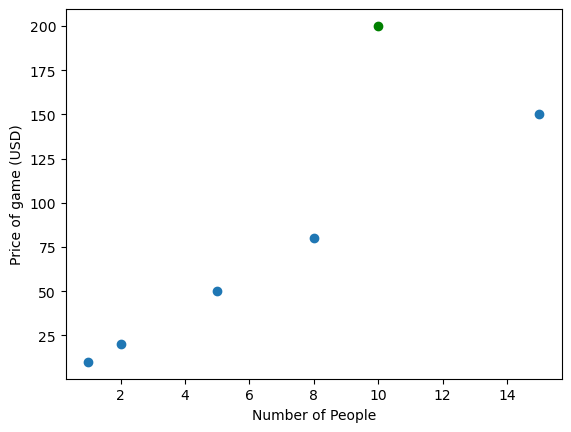

In [376]:
# game_name은 게임의 이름을 나타냅니다.
# game_price는 컴퓨터 게임의 가격을 나타내고 num_people은 게임을 좋아한 사람들의 수를 나타냅니다.
game_name = ['Phone of duty','PIFA soccer','Lario cart','Hokemon','Loom','League of failures','Fritnite']
game_price = [10,20,50,150,80,200,1000]
num_people = [1,2,5,15,8,10,1]

plt.scatter(num_people[0:5],game_price[0:5])
plt.scatter(num_people[5],game_price[5],c='g')

plt.xlabel('Number of People')
plt.ylabel('Price of game (USD)')

plt.show()


이제 게임 가격과 게임을 좋아한 사람들의 수 사이에 선형 관계가 있는 것으로 보입니다. 더 많은 사람들이 게임을 좋아할수록 게임의 가격은 더 높아집니다.

그런데 선형 관계에 맞지 않은 점을 눈치채셨나요?

녹색 점이 맞지 않는다는 것을 눈치채셨다면 맞습니다. 게임 가격과 게임을 좋아하는 사람들의 수가 현실적으로 보이는 만큼, 오류 데이터라기 보다는 이상치일 가능성이 높습니다. 위에서 언급되었지만 이상치는 오류 데이터 포인트가 아닐 수 있습니다. 이 경우 12명만 좋아하는 매우 비싼 게임일 수 있습니다.

이상치를 제거하거나 이상치를 유지할 수 있습니다. 데이터 포인트가 충분하거나 이상값을 대체하기 위해 더 많은 포인트를 수집할 수 있는 경우 데이터 세트에서 이상값을 제거할 수 있습니다. 이상값을 제거해야 하는지 여부를 결정하는 엄격한 규칙은 없습니다. 그러나 이상값이 데이터세트의 다수를 구성하는 경우 이를 제거해서는 안 되며 대신 더 많은 데이터를 수집하여 실제로 이상값인지 확인해야 합니다. 이 예에서는 하나의 이상값만 있는 것 같으므로 이상값을 제거합니다. 아래 코드를 실행하여 이상값을 제거하고 새로운 산점도를 그려보세요.


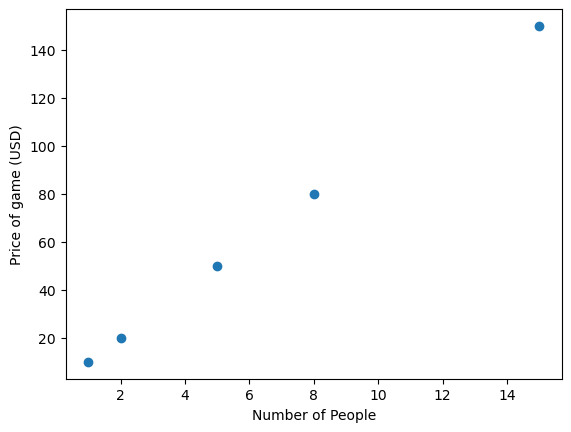

In [377]:
# game_name은 게임의 이름을 나타냅니다.
# game_price는 컴퓨터 게임의 가격을 나타내고 num_people은 게임을 좋아한 사람들의 수를 나타냅니다.
game_name = ['Phone of duty','PIFA soccer','Lario cart','Hokemon','Loom','Fritnite']
game_price = [10,20,50,150,80,1000]
num_people = [1,2,5,15,8,1]

plt.scatter(num_people[0:5],game_price[0:5])

plt.xlabel('Number of People')
plt.ylabel('Price of game (USD)')

plt.show() 

새로운 그래프를 보면 이제 게임 가격이 게임을 좋아하는 사람들의 수와 선형 관계를 보인다는 것을 관찰할 수 있습니다.

## 1.2 데이터 프레임에서 오류 데이터 처리 

CSV 파일 "Students_Score1.csv"가 제공됩니다. 여기에는 학생이 공부한 시간과 수학, 영어 및 과학 시험 점수에 대한 데이터가 포함되어 있습니다. 학생이 공부에 더 많은 시간을 할애할 때 더 나은 점수를 받아야 한다고 가정합니다. 그러나 연구에 따르면 학생은 하루에 16시간 이상 공부할 수 없습니다. 또한 일부 데이터가 잘못되었을 수도 있습니다. 데이터에서 오류가 확인되면 데이터의 전체 행을 제거해야 합니다. 오류 데이터를 식별하고 제거할 수 있습니까?

먼저 데이터를 데이터 프레임 df로 읽어 옵니다.

In [378]:
import pandas as pd
df = pd.read_csv('C:\\Users\\gadi2\\OneDrive\\바탕 화면\study file\\[Dataset] Module17 (Students_Score1).csv')

헤더와 df의 처음 5개 행을 출력합니다. 또한 df의 .info()를 출력합니다. 출력된 정보로 데이터 프레임의 열 이름을 이해하고, 누락된 값을 확인할 수 있습니다.

In [379]:
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Student No.                    267 non-null    int64  
 1   Hours spent studying in a day  267 non-null    int64  
 2   Mathematics score              267 non-null    int64  
 3   English score                  267 non-null    float64
 4   Science score                  267 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 10.6 KB


이제 열의 이름을 알았습니다. 오류 데이터를 확인하려면 시간과 점수의 최소값과 최대값을 알아야 합니다. 이러한 세부 사항을 알아보려면 .describe()를 이용하여 정보를 출력합니다.

In [380]:
df.describe()

,Student No.,Hours spent studying in a day,Mathematics score,English score,Science score
count,267.000000,267.000000,267.000000,267.000000,267.000000
mean,134.000000,12.123596,48.749064,43.539326,38.795506
std,77.220464,7.668636,31.802503,28.521820,24.539635
min,1.000000,-10.000000,-40.000000,-36.000000,-32.000000
25%,67.500000,6.000000,24.000000,21.600000,19.200000
50%,134.000000,12.000000,48.000000,43.200000,38.400000
75%,200.500000,18.000000,74.000000,66.600000,57.600000
max,267.000000,40.000000,175.000000,144.000000,128.000000


위에 표시된 최소값과 최대값에서 오류 데이터가 있는 열을 구분할 수 있습니까?

시간, 수학 점수, 영어 점수, 과학 점수 모두 이상치가 있습니다.

이제 오류가 있는 데이터를 제거해 보겠습니다. 우리는 먼저 수학 점수에 대해 작업을 진행합니다. 코드는 수학 점수가 0보다 작거나 100보다 큰 행을 제거할 수 있어야 합니다. 아래 코드를 실행해 보세요!

In [381]:
# 수학 오류 데이터 삭제하기
df = df[(df['Mathematics score']>=0) & (df['Mathematics score']<=100)]


#print(df['Mathematics score'])

#print(df.describe())
df.shape

(261, 5)

In [382]:
#비트 연산 예시

a = 0b1111111
print(a)

b = 0b0000001
print(b)

print(a&b)
print(a|b)

127
1
1
127


In [383]:
# 과학 오류 데이터 삭제하기
df3 = df2[(df2['Science score']>=0) & (df2['Science score']<=100)]

#print(df['Science score'])

#print(df.describe())
df3.shape

(373, 5)

In [384]:
# 영어 오류 데이터 삭제하기
df4 = df3[(df3['English score']>=0) & (df3['English score']<=100)]

#print(df['English score'])

#print(df.describe())
df4.shape

(373, 5)

0보다 작거나 100보다 큰 데이터가 제거되기 전과 후의 '수학 점수' 정보를 비교합니다. 무엇을 확인할 수 있나요?

수학 점수는 이제 0과 100 사이의 값으로 실제 시험 결과로 가능한 점수 입니다.

출력 결과를 데이터 제거 전의 결과와 비교하면 이제 수학 점수 범위가 0에서 96까지인 것을 알 수 있습니다. 또한 .info()에서 데이터 포인트 수가 267에서 261로 감소했음을 알 수 있습니다. 이는 수학 점수에서 6개의 오류가 있음을 나타냅니다.

이제 영어 점수, 과학 점수 및 하루 공부 시간 열에서 오류 데이터를 제거할 차례입니다. 코드 마지막에 .describe() 및 .info()를 사용하여 정보를 출력합니다.

In [385]:
#your code here
df5 = df4[(df4['Hours spent studying in a day']>=0) & (df4['Hours spent studying in a day']<=16)]

#print(df['Hours spent studying in a day'])

#df.describe()
#print(df.info())
df5.shape

(373, 5)

In [386]:
print(df5['Hours spent studying in a day'])

df5.describe()
#print(df.info())

0       0.0
1       3.0
2       2.0
3      13.0
4       0.0
       ... 
382     0.0
383    11.0
384     0.0
385     7.0
386     1.0
Name: Hours spent studying in a day, Length: 373, dtype: float64


,Student No.,Hours spent studying in a day,Mathematics score,English score,Science score
count,373.000000,373.000000,373.000000,373.000000,373.000000
mean,196.753351,7.083110,35.415550,30.457373,29.749062
std,112.588714,4.477069,22.385346,19.251398,18.803691
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,3.000000,15.000000,12.900000,12.600000
50%,201.000000,7.000000,35.000000,30.100000,29.400000
75%,294.000000,11.000000,55.000000,47.300000,46.200000
max,387.000000,15.000000,75.000000,64.500000,63.000000


.describe()에서 얻은 정보에서 몇개의 오류 데이터가 있는지 확인할 수 있습니까? 또한 각 과목에 대한 정확한 최소 및 최대 점수를 파악할 수 있습니까?

위의 표에서 학생의 점수에서 총 88개의 오류 데이터가 있음을 관찰할 수 있습니다!

수학: 최소:0, 최대:64
영어: 최소:0, 최대:57.6
과학: 최소:0, 최대:51.2

## 2. 누락 데이터

누락된 데이터는 데이터세트 내의 비어있는 것을 나타냅니다. 이는 모든 데이터 포인트를 수집할 수 없기 때문입니다. 예를 들어 매일 우편 배달부가 배달한 편지의 수를 계산해야 하는 경우 우편 배달부가 휴가를 낸 날짜에 대한 데이터가 없을 수 있습니다. 따라서 해당 날짜의 데이터를 누락된 데이터로 채우게 됩니다. 데이터가 누락되는 또 다른 가능한 이유는 데이터를 수집하는 사람의 부주의 때문일 수 있습니다. 때때로 데이터를 수집하는 사람이 데이터 세트에 데이터를 입력하는 것을 잊었을 수 있습니다. 또한 설문조사 양식에서 데이터를 얻는 경우 불완전한 양식으로 인해 데이터가 누락될 수 있습니다. 모든 사람이 설문조사 양식의 모든 필드를 채우는 것은 아니기 때문입니다.

다음에 나열한 상황에서 데이터가 누락될 수 있는 몇 가지 이유를 제시할 수 있습니까?
- 선생님이 하루에 학교에서 보내는 시간
- 직장인이 하루에 휴대폰으로 받는 전화 수
- 도시의 대기 온도

선생님이 휴가일 가능성이 있음, 직장인이 자리를 비우거나 휴대폰이 없거나 고장일 수 있음, 대기 온도 측정 장치가 고장일 수 있음

누락된 데이터는 다양한 형식을 가질 수 있습니다. 일반적으로 누락된 데이터를 NaN이라고 하지만 일부 데이터 세트는 누락된 데이터를 나타내기 위해 매우 큰 숫자 또는 매우 작은 숫자를 사용합니다. 한 가지 예는 기상 또는 날씨 데이터의 예가 될 것입니다. -9999 값은 이러한 데이터 세트에서 누락된 데이터 값을 나타내는 데 사용됩니다.

분석을 수행하기 전에 데이터 세트에서 이러한 누락된 데이터 값을 제거하거나 교체하는 것이 중요합니다. 이는 분석의 정확성을 보장하기 위한 것입니다.

아래 예에서는 이러한 누락된 값을 식별하고 처리하는 방법을 알아봅시다.

## 2.1 집 가격

당신과 당신의 친구 Ben은 동네의 집값이 집 안의 방 수와 관련이 있는지 확인하는 임무를 받았습니다. 좋은 친구인 Ben은 당신을 위해 모든 데이터를 수집하기로 결정했습니다. 그러나 Ben은 부주의하여 일부 데이터 누락하였을 수 있습니다. 누락된 데이터가 있는지 확인하도록 도와줄 수 있습니까?

데이터는 아래에 나와 있습니다. House_prices는 미국 달러(USD)로 표시된 집의 가격을 나타내고 Num_rooms는 집에 있는 방의 수를 나타냅니다. 코드를 실행하고 출력을 주의 깊게 관찰하십시오!

In [387]:
House_prices = [10050,42300,50206,np.nan,105000,np.nan,22350]
Num_rooms = [np.nan,4,5,6,10,12,2]

print('Total number of data points in House_prices = ',np.count_nonzero(~np.isnan(House_prices)))
print('Total number of data points in Num_rooms = ',np.count_nonzero(~np.isnan(Num_rooms)))

Total number of data points in House_prices =  5
Total number of data points in Num_rooms =  6


In [388]:
# ~를 입력하면 반대값(1이면 0, 0이면 1, 참이면 거짓, 거짓이면 참으로 출력된다)
~np.isnan(House_prices)

array([ True,  True,  True, False,  True, False,  True])

House_prices의 데이터 포인트 수가 Num_rooms의 데이터 포인트 수와 다른 이유는 무엇입니까? 총 몇 채의 집이 있습니까?

#your answer here

집은 총 7채입니다. 원룸이라 방이 없거나 못물어봤을 수 있습니다.

데이터 세트에서 누락된 데이터를 제거하고, 아래 산점도를 그려보세요. 축에 레이블을 지정합니다. 누락된 값이 있는 데이터는 모두 제거해야 합니다. 예를 들어 집값에 누락된 값이 있는 경우 해당하는 방 수 값도 제거해야 합니다. 산점도에서 무엇을 확인할 수 있습니까?

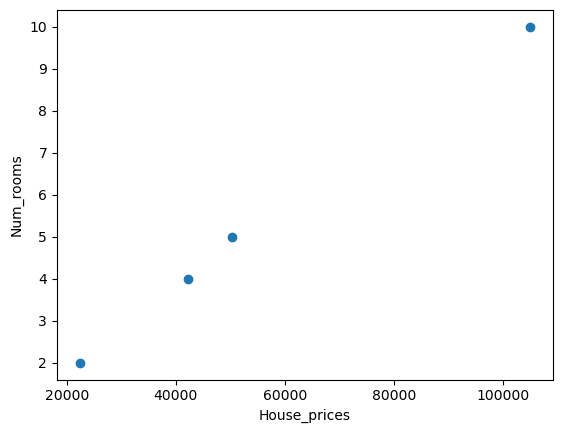

In [389]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

House_prices = [10050, 42300, 50206, np.nan, 105000, np.nan, 22350]
Num_rooms = [np.nan, 4, 5, 6, 10, 12, 2]

df = pd.DataFrame({'House_prices': House_prices, 'Num_rooms': Num_rooms})

# 누락된 값이 있는 행 제거
df = df.dropna()

plt.scatter(df['House_prices'], df['Num_rooms'])
plt.xlabel('House_prices')
plt.ylabel('Num_rooms')
plt.show()


산점도는 방 수와 집값 사이의 직접적인 관계를 보여줍니다.
방이 많은 집은 더 비쌉니다.

<font color=blue>보너스: 누락된 값의 정확한 값을 추측할 수 있습니까? 누락된 값을 추측된 값으로 대체하고 산점도를 다시 그리십시오!</font>

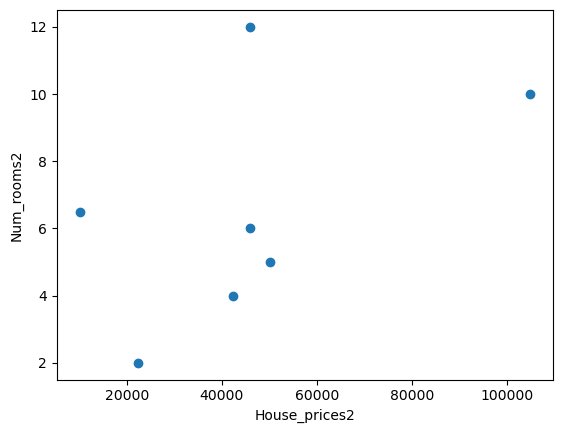

In [390]:
House_prices2 = [10050, 42300, 50206, np.nan, 105000, np.nan, 22350]
Num_rooms2 = [np.nan, 4, 5, 6, 10, 12, 2]

df = pd.DataFrame({'House_prices2': House_prices2, 'Num_rooms2': Num_rooms2})

# 누락된 값을 열의 평균값으로 대체
df_filled = df.fillna(df.mean())
# 중앙값으로 누락된 값 대체
#df_filled = df.fillna(df.median())

plt.scatter(df_filled['House_prices2'], df_filled['Num_rooms2'])
plt.xlabel('House_prices2')
plt.ylabel('Num_rooms2')
plt.show()


## 2.2 데이터 프레임에서 누락된 값 처리

학생의 시험 결과와 공부 시간이 포함된 데이터를 처리하라는 요청을 다시 받았습니다. 데이터는 "Students_Score2.csv" 파일에 저장되어 있습니다. 모든 학생이 학습 시간을 보고한 것은 아니므로 데이터에 누락된  값이 있습니다. 누락된 값을 제거하고 누락된 데이터가 있는 총 학생 수를 보고합니다.

먼저 데이터를 데이터 프레임 df로 읽습니다.

In [391]:
df= pd.read_csv('C:\\Users\\gadi2\OneDrive\\바탕 화면\\study file\\[Dataset] Module 17 (Students_Score2).csv')

헤더와 df의 처음 5개 행을 출력합니다. 또한 df의 .info()를 출력합니다.

In [392]:
print(df.head(5))

print('= '*20)

df.info()

   Student No.  Hours spent studying in a day  Mathematics score  \
0            1                            0.0                0.0   
1            2                            3.0               15.0   
2            3                            2.0               10.0   
3            4                           13.0               65.0   
4            5                            0.0                0.0   

   English score  Science score  
0            0.0            0.0  
1           12.9           12.6  
2            8.6            8.4  
3           55.9           54.6  
4            0.0            0.0  
= = = = = = = = = = = = = = = = = = = = 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Student No.                    387 non-null    int64  
 1   Hours spent studying in a day  382 non-null    float64
 2

.info() 출력에서 각 열에 대해 다른 행 수가 관찰되었습니까? 행 수가 다른 것은 행에 누락된 숫자가 있기 때문입니다.

누락된 값을 처리하기 전에 먼저 잘못된 데이터를 확인해야 합니다. .describe()를 출력하고 최소값과 최대값을 관찰하십시오.

In [393]:
df.describe()

,Student No.,Hours spent studying in a day,Mathematics score,English score,Science score
count,387.000000,382.000000,383.000000,382.000000,383.000000
mean,194.000000,7.083770,35.417755,30.392670,29.641253
std,111.861522,4.473697,22.271713,19.258215,18.783876
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,97.500000,3.000000,15.000000,12.900000,12.600000
50%,194.000000,7.000000,35.000000,30.100000,29.400000
75%,290.500000,11.000000,55.000000,47.300000,46.200000
max,387.000000,15.000000,75.000000,64.500000,63.000000


이제 공부한 시간이 0에서 15 사이이고 모든 점수도 0에서 100 사이임을 알 수 있습니다. 이는 데이터 세트에 오류가 없음을 나타냅니다.

이제 데이터 세트에서 누락된 값을 제거하겠습니다. Pandas는 우리가 그것을 쉽게 할 수 있도록 하는 좋은 기능을 가지고 있습니다. .dropna()라고 합니다. 이를 사용하여 행 또는 열별로 누락된 값을 삭제할 수 있습니다. 예를 들어, 누락된 값이 있는 행을 제거하려면 df.dropna(axis=0)를 호출하면 됩니다. 누락된 값이 있는 열을 제거하려면 df.dropna(axis=1)를 호출하면 됩니다. .dropna()에 대한 자세한 내용은 [여기](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)에서 확인할 수 있습니다.

학생 점수의 경우 누락된 값을 행별로 제거해야 하나요 아니면 열로 제거해야 하나요?

각 행이 학생을 나타내므로 행별로 누락된 값을 제거해야 합니다.

이제 아래에서 누락된 값을 제거할 수 있는 코드를 작성하십시오. .dropna()를 사용하여 누락된 값을 제거하는 방법에 대한 정보는 이 [링크](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)를 참조하세요. 원본 데이터 프레임을 편집하지 않도록 출력을 새 데이터 프레임에 할당하여 진행세요. <br>
df2 = df.(여기서 귀하의 기능)을 사용하여 새 데이터 프레임에 할당할 수 있습니다.

In [394]:
df2 = df.dropna(axis=0)

새 데이터 프레임에 대한 .info()를 인쇄하고 각 열에 대해 null이 아닌 값의 수를 관찰합니다.

In [395]:
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 386
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Student No.                    373 non-null    int64  
 1   Hours spent studying in a day  373 non-null    float64
 2   Mathematics score              373 non-null    float64
 3   English score                  373 non-null    float64
 4   Science score                  373 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 17.5 KB


,Student No.,Hours spent studying in a day,Mathematics score,English score,Science score
count,373.000000,373.000000,373.000000,373.000000,373.000000
mean,196.753351,7.083110,35.415550,30.457373,29.749062
std,112.588714,4.477069,22.385346,19.251398,18.803691
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,3.000000,15.000000,12.900000,12.600000
50%,201.000000,7.000000,35.000000,30.100000,29.400000
75%,294.000000,11.000000,55.000000,47.300000,46.200000
max,387.000000,15.000000,75.000000,64.500000,63.000000


In [396]:
df.isna().any()

Student No.                      False
Hours spent studying in a day     True
Mathematics score                 True
English score                     True
Science score                     True
dtype: bool

이제 모든 열에 대해 행의 숫자가 동일한 것을 확인할 수 있습니까? 데이터가 누락된 학생은 몇 명입니까?

In [397]:
a = 382-373
print(a)

9


<font color=Blue>보너스: 누락된 값을 제거하는 것은 쉽지만 데이터 세트가 매우 작기 때문에 때때로 제거하지 않습니다. 값을 제거하면 더 작은 데이터세트가 생성됩니다. 따라서 누락된 값을 대신 다른 값으로 채울 수도 있습니다. 평균값 또는 빈도가 높은 값으로 누락된 값을 채우도록 선택할 수 있습니다. 예를 들어 수학 점수 값이 누락된 경우 모든 학생의 수학 점수 평균 값을 찾아 해당 값으로 누락 값을 채울 수 있습니다. 아래 코드를 실행하고 출력을 관찰하십시오!</font>

In [398]:
# .copy()는 원본 데이터 프레임 변경을 방지하기 위해 전체 데이터 프레임 복사를 허용합니다.
df3 = df.copy()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Student No.                    387 non-null    int64  
 1   Hours spent studying in a day  382 non-null    float64
 2   Mathematics score              383 non-null    float64
 3   English score                  382 non-null    float64
 4   Science score                  383 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 15.2 KB


이제 수학 점수의 누락된 값이 채워졌고 이전에 표시된 383개의 null이 아닌 값 대신 387개 값이 표시됩니다. 이제 나머지 열에 대한 누락된 값을 각각의 평균으로 채워 보십시오.

In [399]:
df3 = df3.fillna(df.mean())
df3.info()
df3.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Student No.                    387 non-null    int64  
 1   Hours spent studying in a day  387 non-null    float64
 2   Mathematics score              387 non-null    float64
 3   English score                  387 non-null    float64
 4   Science score                  387 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 15.2 KB


,Student No.,Hours spent studying in a day,Mathematics score,English score,Science score
count,387.000000,387.000000,387.000000,387.000000,387.000000
mean,194.000000,7.083770,35.417755,30.392670,29.641253
std,111.861522,4.444627,22.156015,19.133079,18.686297
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,97.500000,3.000000,17.500000,12.900000,12.600000
50%,194.000000,7.000000,35.000000,30.100000,29.400000
75%,290.500000,11.000000,55.000000,47.300000,46.200000
max,387.000000,15.000000,75.000000,64.500000,63.000000
